In [2]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import torch

Testing


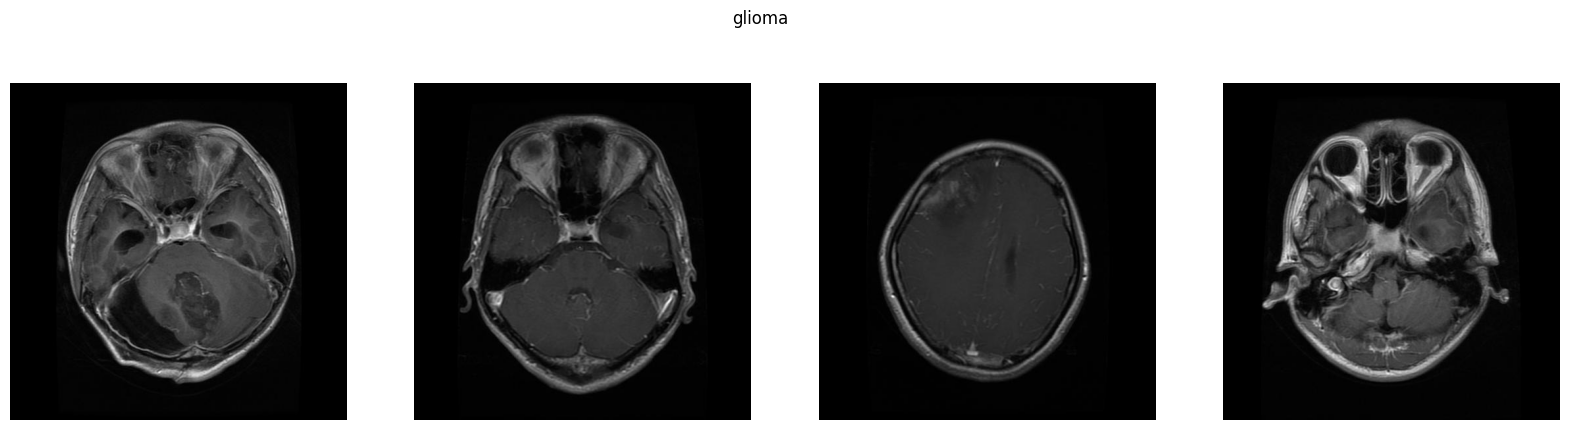

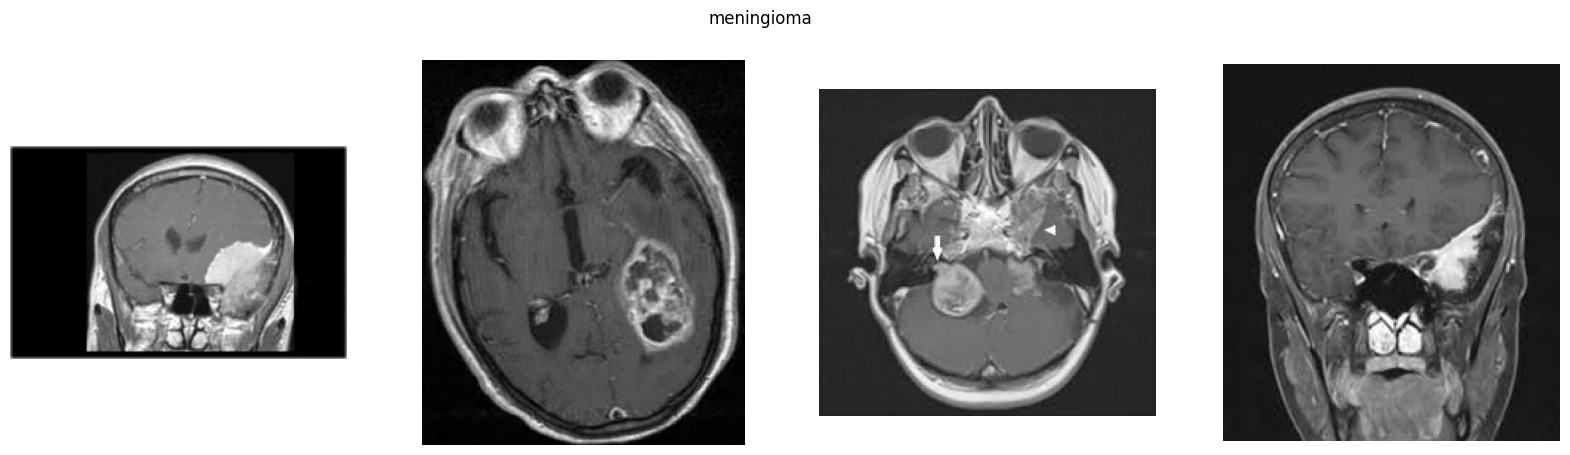

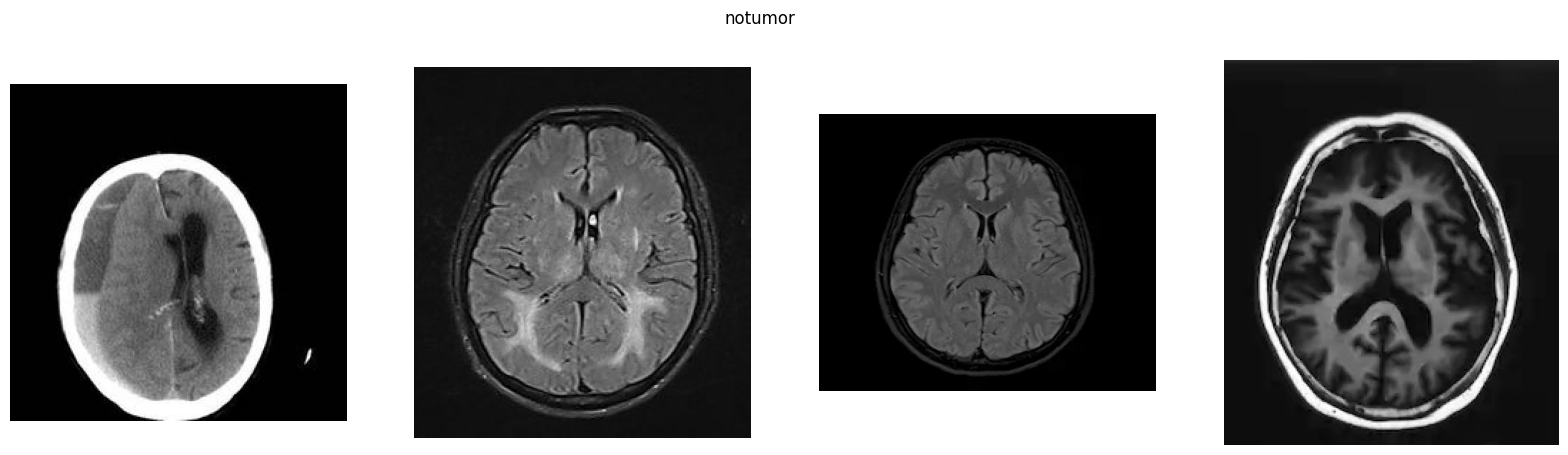

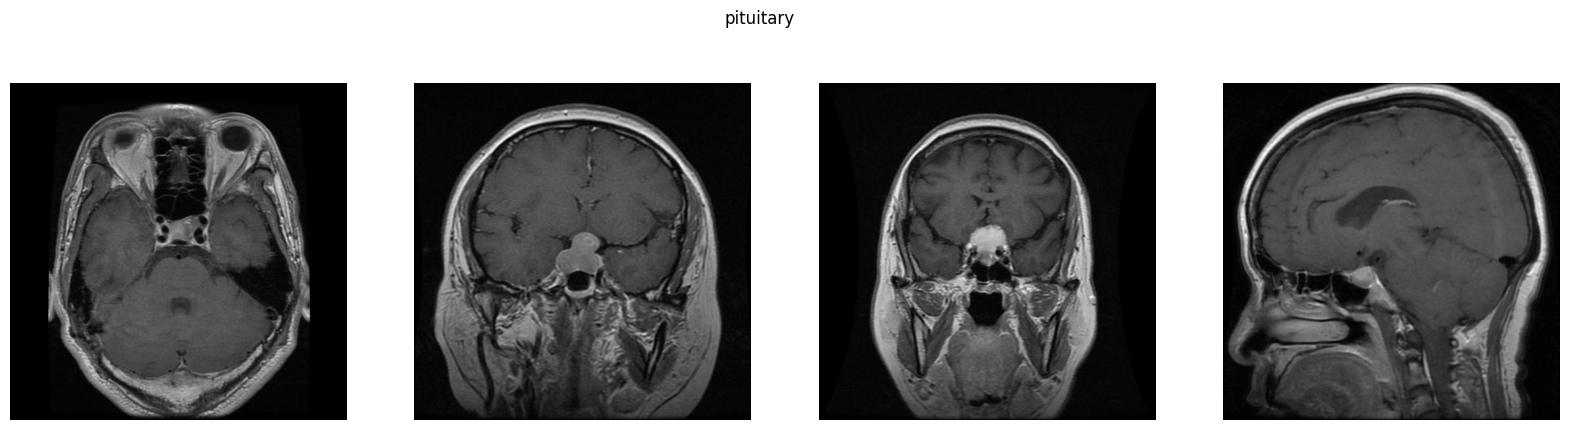

Training


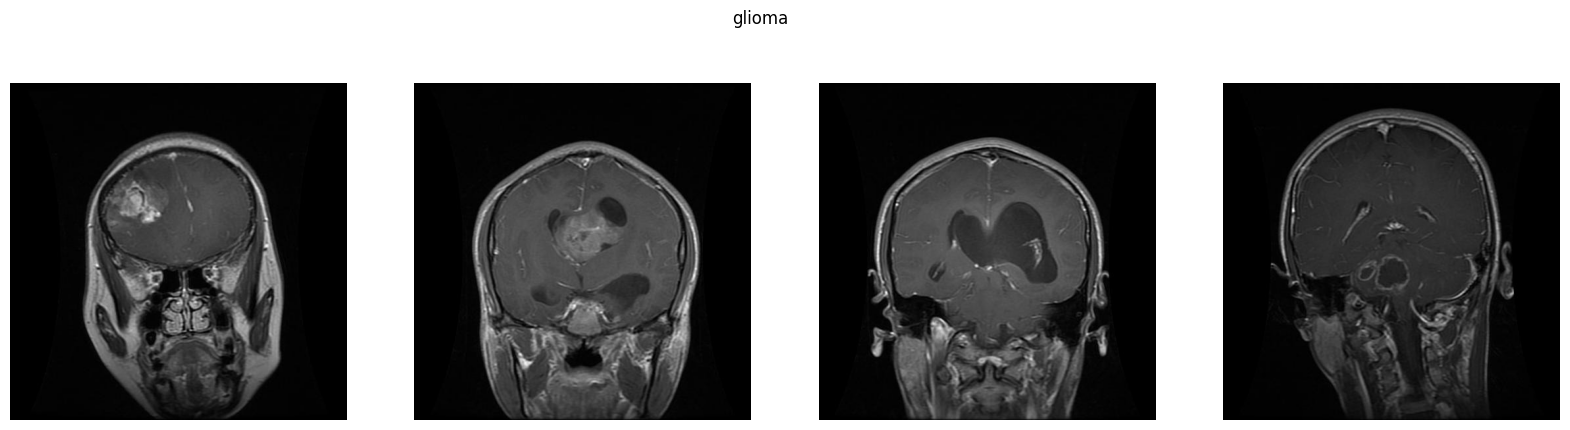

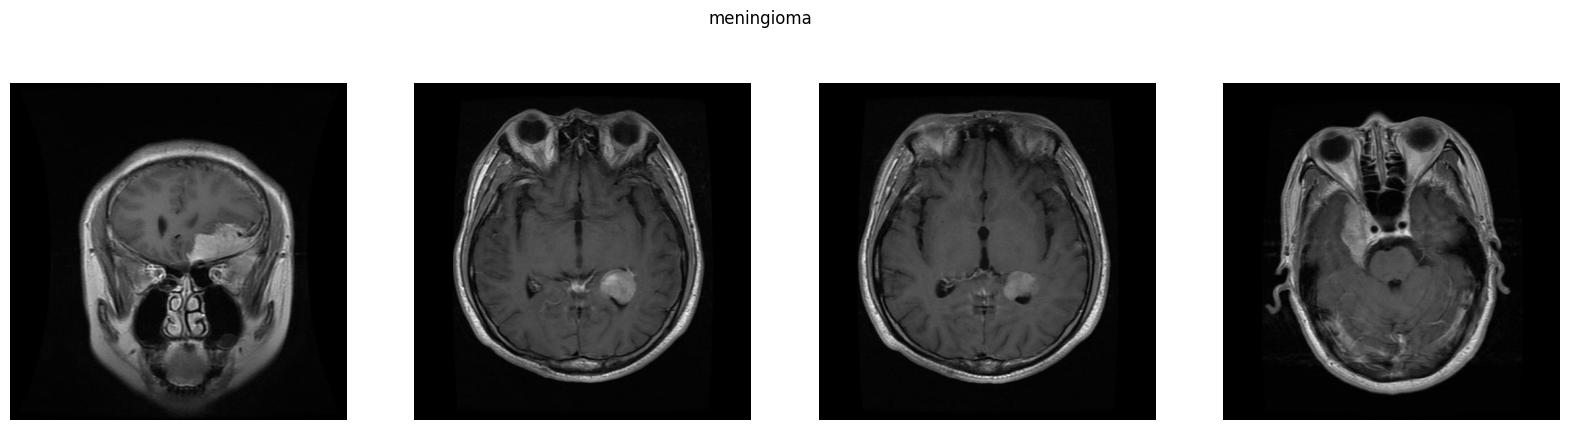

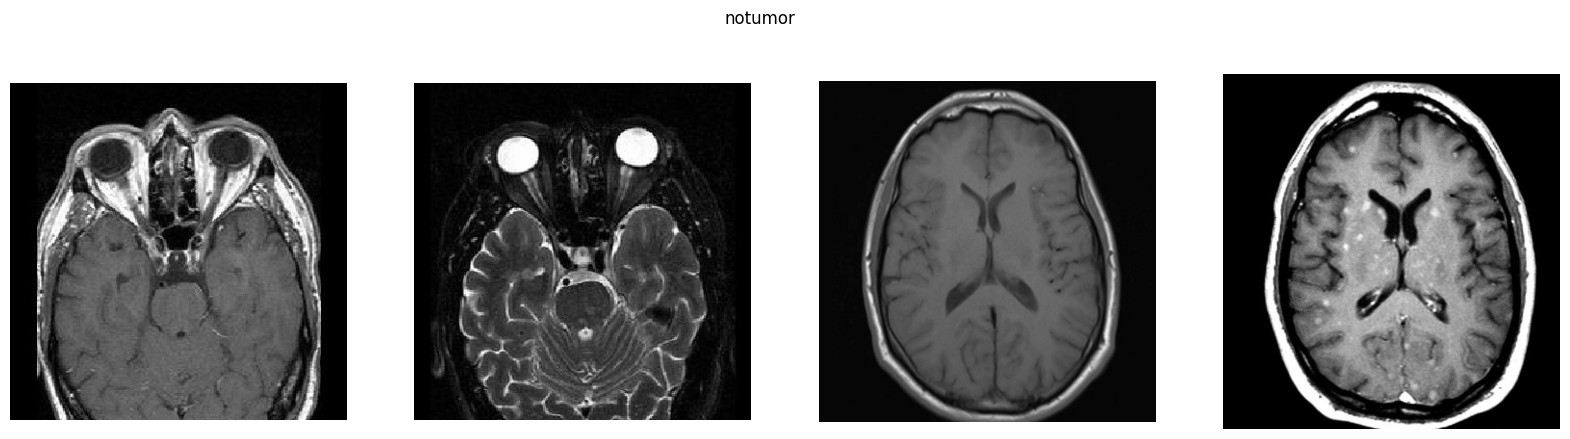

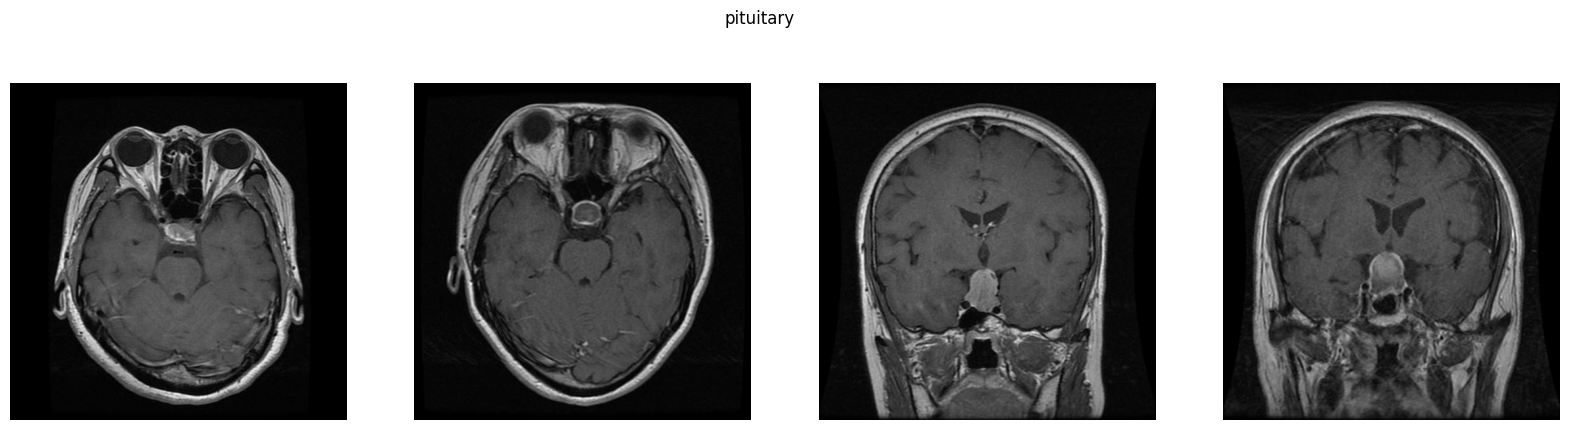

In [ ]:
# Displayning the images
path ="Brain_Tumor_MRI_Dataset"

for file in os.listdir(path):
        print(file)
        for TumorType in os.listdir(os.path.join(path,file)):
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))
            fig.suptitle(TumorType)
            for i, image in enumerate(os.listdir(os.path.join(path,file,TumorType))):
                if i >= 4:  # Only show first 4 images
                    break
                img = cv2.imread(os.path.join(path,file,TumorType,image))
                axes[i].imshow(img)
                axes[i].axis('off')
            plt.show()



In [11]:
image_shapes = set()
for file in os.listdir(path):
    for TumorType in os.listdir(os.path.join(path,file)):
        for image in os.listdir(os.path.join(path,file,TumorType)):
            img = cv2.imread(os.path.join(path,file,TumorType,image))
            image_shapes.add(img.shape)

In [17]:
print(image_shapes)
print(len(image_shapes))

{(395, 367, 3), (290, 236, 3), (717, 717, 3), (302, 216, 3), (245, 206, 3), (512, 434, 3), (250, 201, 3), (274, 230, 3), (442, 442, 3), (228, 233, 3), (480, 853, 3), (484, 405, 3), (248, 208, 3), (417, 428, 3), (344, 320, 3), (273, 236, 3), (236, 236, 3), (244, 206, 3), (470, 469, 3), (214, 229, 3), (496, 453, 3), (216, 234, 3), (439, 645, 3), (395, 416, 3), (236, 255, 3), (342, 323, 3), (257, 235, 3), (1080, 1920, 3), (340, 507, 3), (222, 233, 3), (260, 314, 3), (486, 421, 3), (512, 416, 3), (270, 250, 3), (415, 339, 3), (301, 275, 3), (243, 207, 3), (903, 721, 3), (300, 227, 3), (372, 341, 3), (592, 562, 3), (282, 230, 3), (225, 209, 3), (306, 278, 3), (361, 642, 3), (355, 330, 3), (228, 236, 3), (213, 210, 3), (872, 850, 3), (223, 224, 3), (248, 200, 3), (218, 234, 3), (320, 497, 3), (320, 257, 3), (248, 257, 3), (365, 306, 3), (613, 605, 3), (239, 236, 3), (354, 298, 3), (258, 300, 3), (280, 236, 3), (201, 173, 3), (228, 228, 3), (480, 480, 3), (198, 150, 3), (244, 201, 3), (234, 2

There are 387 unique image shapes in the dataset. We need to resize all the images into a single shape.

In [18]:
# Resize the images to a single shape
resized_path = "Brain_Tumor_MRI_Dataset_Resized"
if not os.path.exists(resized_path):
    os.makedirs(resized_path)

# Target size for all images is 224*224 becouse most of the CNN architectures are trained on 224*224 size images
target_size = (224, 224)

for file in os.listdir(path):
    file_path = os.path.join(resized_path, file)
    if not os.path.exists(file_path):
        os.makedirs(file_path)
        
    for TumorType in os.listdir(os.path.join(path, file)):
        tumor_path = os.path.join(file_path, TumorType)
        if not os.path.exists(tumor_path):
            os.makedirs(tumor_path)
            
        for image in os.listdir(os.path.join(path, file, TumorType)):
            img = cv2.imread(os.path.join(path, file, TumorType, image))
            resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
            cv2.imwrite(os.path.join(tumor_path, image), resized_img)

print("All images have been resized and saved to:", resized_path)


All images have been resized and saved to: Brain_Tumor_MRI_Dataset_Resized


Testing


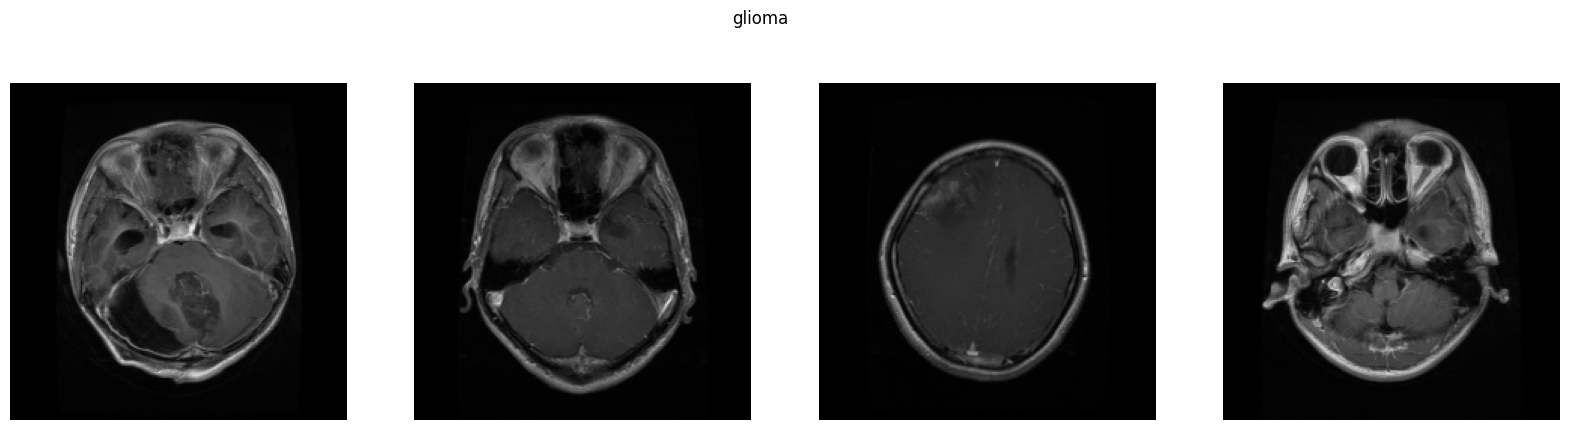

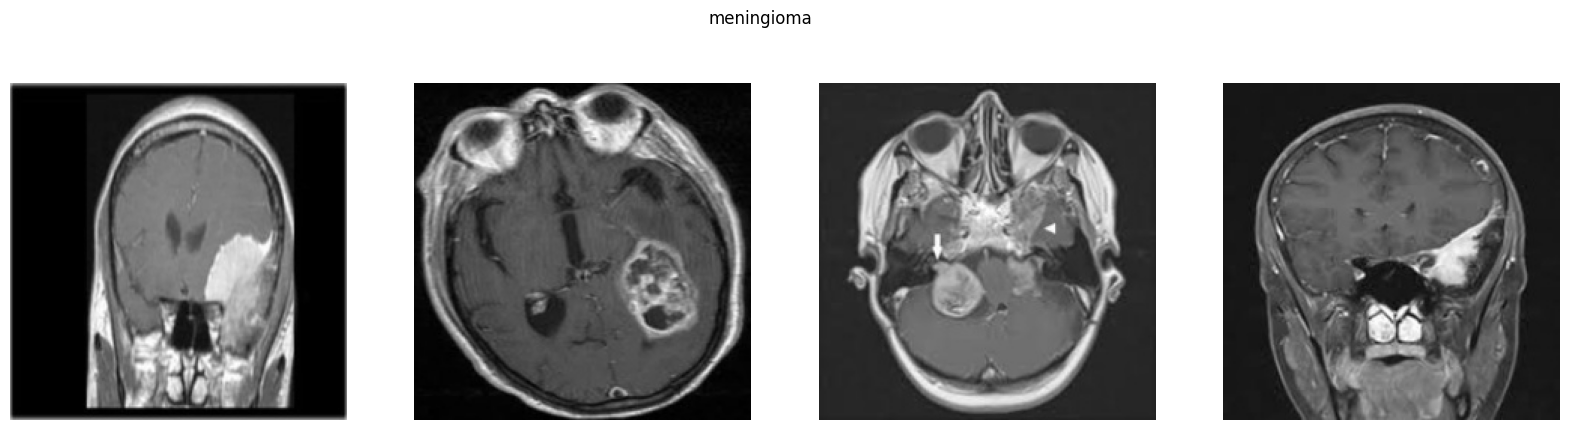

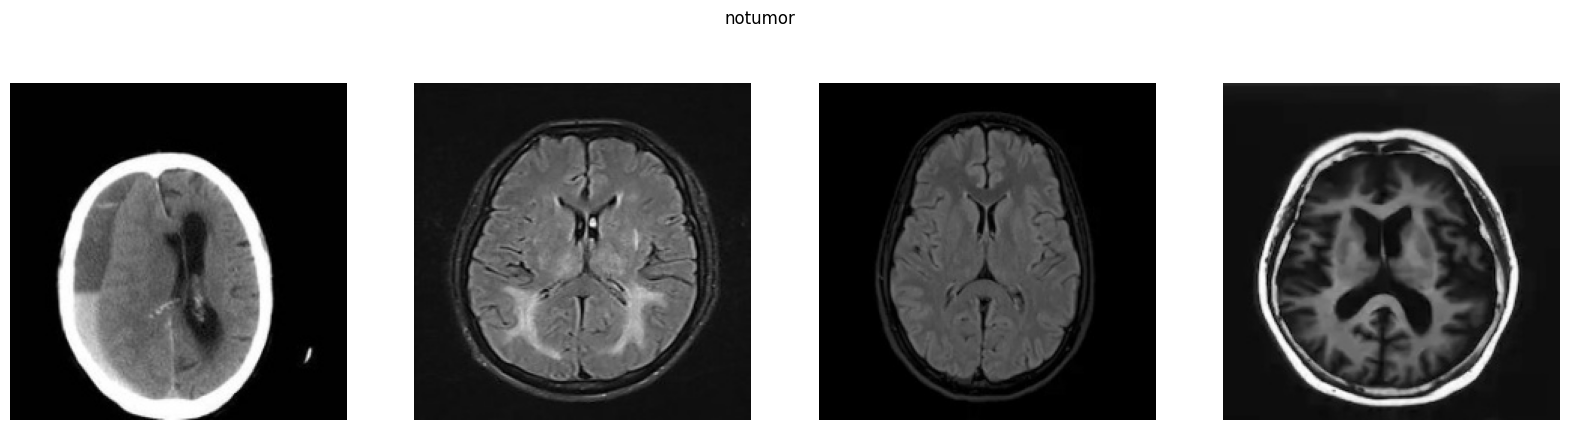

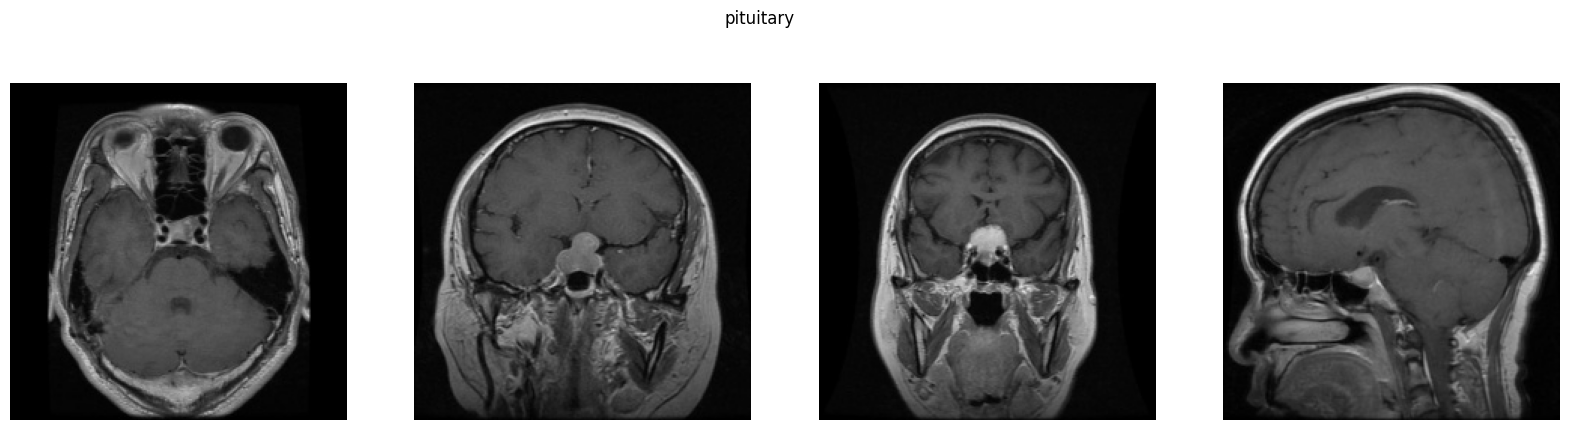

Training


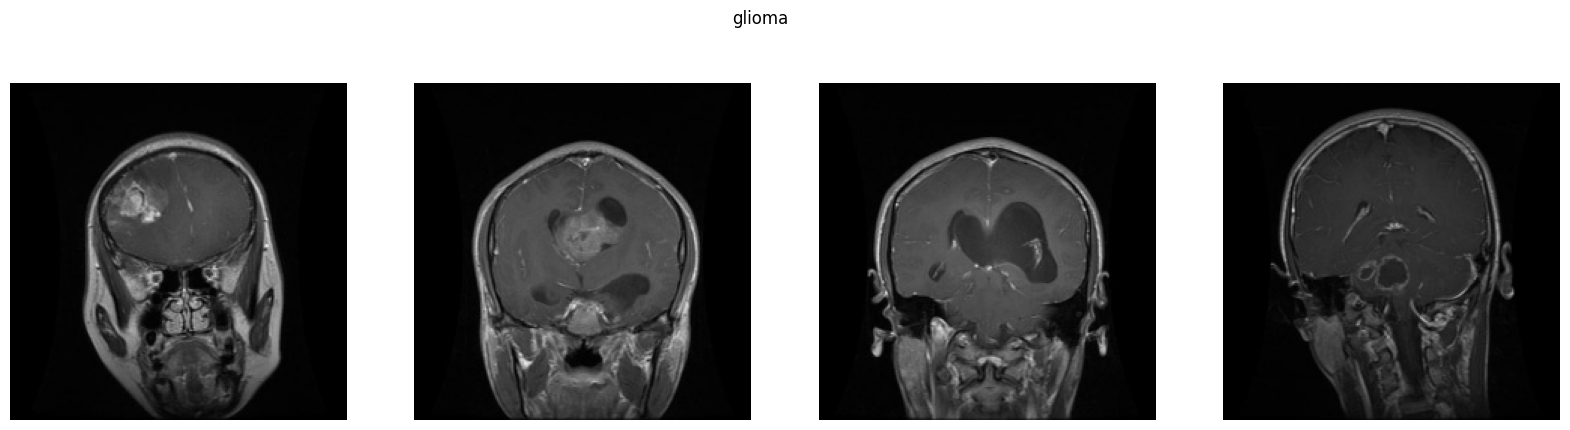

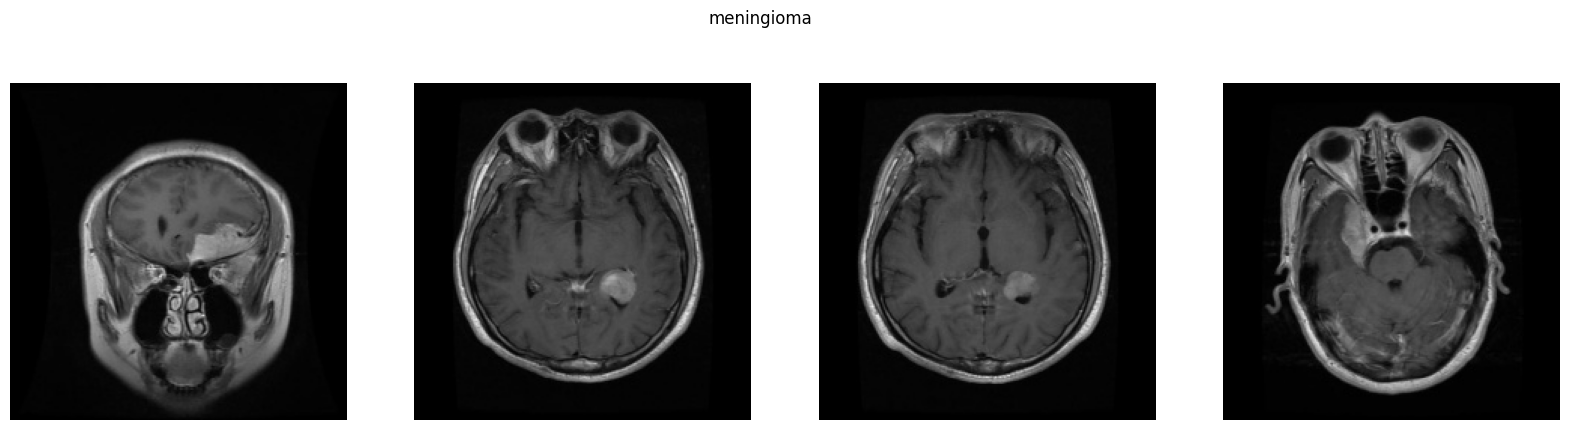

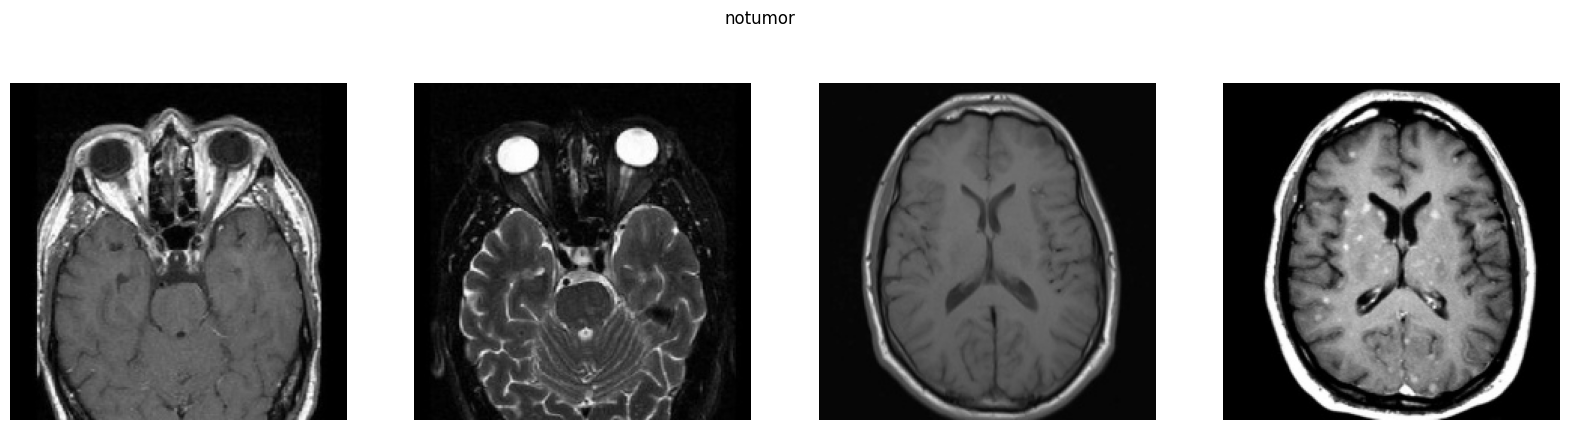

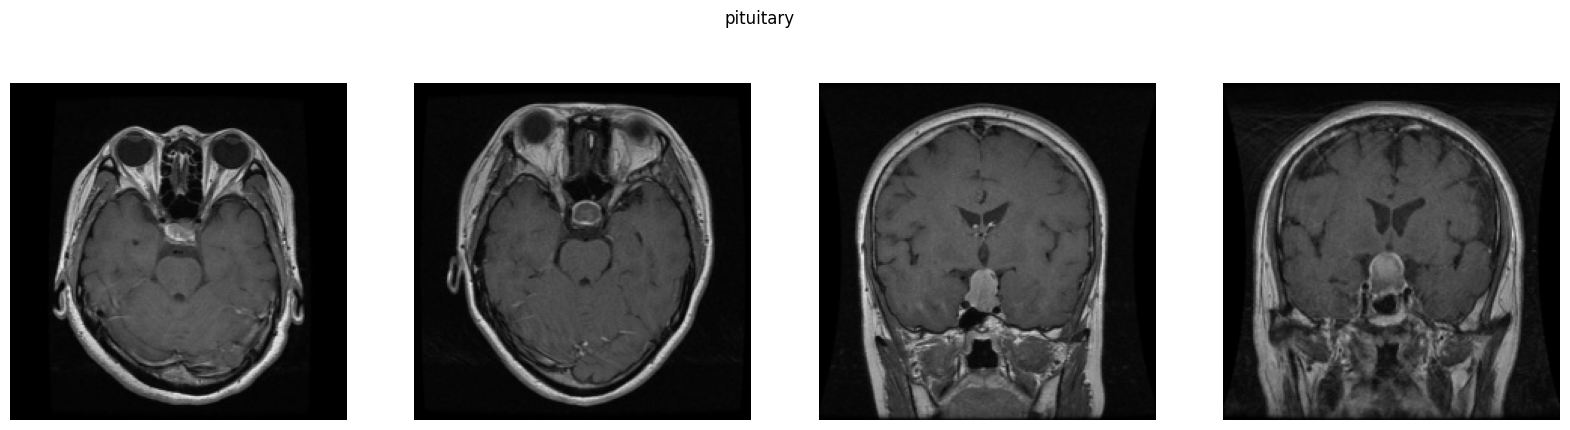

In [20]:
# Displaying the resized images
path ="Brain_Tumor_MRI_Dataset_Resized"

for file in os.listdir(path):
        print(file)
        for TumorType in os.listdir(os.path.join(path,file)):
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))
            fig.suptitle(TumorType)
            for i, image in enumerate(os.listdir(os.path.join(path,file,TumorType))):
                if i >= 4:  # Only show first 4 images
                    break
                img = cv2.imread(os.path.join(path,file,TumorType,image))
                axes[i].imshow(img)
                axes[i].axis('off')
            plt.show()
